In [1]:
from sklearn.datasets import load_iris
import random
from math import log 

In [2]:
def init_data_set():
    iris = load_iris() 
    iris_feature = iris.data.tolist()  
    iris_target = iris.target.tolist() 
    for i in range(len(iris_feature)):
        iris_feature[i].append(iris_target[i])
    return iris_feature

In [3]:
def create_set(data_set,split_rate=0.8):
    
    length=len(data_set)
    train_num=int(length*split_rate)
    test_num=length-train_num
    random_list=[1]*train_num
    random_list.extend([0]*test_num)
    random.shuffle(random_list)
    test_set=[]
    train_set=[]
    
    for i in range(length):
        if random_list[i]==0:
            test_set.append(data_set[i])
        else:
            train_set.append(data_set[i])
    return test_set,train_set

In [4]:
def calculate_Ent(data_set):
    label={}
    for i in data_set:
        if i[-1] not in label.keys():
            label[i[-1]]=1
        else:
            label[i[-1]]+=1
    Ent=0.0
    for i in label:
        tmp=float(label[i])/len(data_set)
        Ent-=tmp*log(tmp,2)
    return Ent

In [5]:
def spliit_Set(data_set,pos,value):
    
    less_Set=[]
    more_Set=[]
    for item in data_set:
        if item[pos]<value:
            less_Set.append(item)
        else:
            more_Set.append(item)
    return less_Set,more_Set

In [6]:
def choose_best_split(data_set):
    
    base_Ent=calculate_Ent(data_set)
    best_increase=0.0
    best_feature=[-1,-1]
    
    for i in range(4):
        features=[j[i] for j in data_set]
        unique=set(features)
        for feature in unique:
            less_Set,more_Set=spliit_Set(data_set, i, feature)
            tmp=len(less_Set)/float(len(data_set))
            new_Ent=tmp*calculate_Ent(less_Set)
            new_Ent+=(1-tmp)*calculate_Ent(more_Set)
            increase=base_Ent-new_Ent
            if increase>best_increase:
                best_increase=increase
                best_feature=[i,feature]
                
    return best_feature,best_increase

In [7]:
def create_tree(data_set):
    myTree={}
    label=[i[-1] for i in data_set]
    label_set=set(label)
    
    if len(label_set)==1:
        myTree['class']=label[0]
        return myTree
    best_feature,best_increase=choose_best_split(data_set)
    
    myTree['node']=best_feature
    less_Set,more_Set=spliit_Set(data_set, best_feature[0], best_feature[1])
    myTree['left']=create_tree(less_Set)
    myTree['right']=create_tree(more_Set)
    return myTree

In [8]:
def draw_tree(data_set):
    myTree={}
    label=[i[-1] for i in data_set]
    label_set=set(label)
    
    if len(label_set)==1:
        return 'type:'+str(label[0])+'\nsample:'+str(len(data_set))
    
    best_feature,best_increase=choose_best_split(data_set)
    string='X['+str(best_feature[0])+']<'+str(best_feature[1])
    string+='\nbest_increase='+str(round(best_increase,3))
    string+='\nsample:'+str(len(data_set))
    myTree[string]={}
    
    less_Set,more_Set=spliit_Set(data_set, best_feature[0], best_feature[1])
    myTree[string]['True']=draw_tree(less_Set)
    myTree[string]['False']=draw_tree(more_Set)
    return myTree 

In [9]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="round4", color='r', fc='0.9')
leafNode = dict(boxstyle="circle", color='m')
arrow_args = dict(arrowstyle="<-", color='g')

def plot_node(node_txt, center_point, parent_point, node_style):
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args)

In [10]:
def get_leafs_num(tree_dict):
    
    leafs_num = 0
    
    root = list(tree_dict.keys())[0]

    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():

        if type(child_tree_dict[key]).__name__=='dict':

            leafs_num += get_leafs_num(child_tree_dict[key])
        else:

            leafs_num += 1

    return leafs_num

In [11]:
def get_tree_max_depth(tree_dict):

    max_depth = 0

    root = list(tree_dict.keys())[0]

    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():

        this_path_depth = 0

        if type(child_tree_dict[key]).__name__ == 'dict':

            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:

            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth

    return max_depth

In [12]:
def plot_mid_text(center_point, parent_point, txt_str):

    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str)
    return

In [13]:
def plotTree(tree_dict, parent_point, node_txt):

    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]

    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)

    plot_mid_text(center_point, parent_point, node_txt)

    plot_node(root, center_point, parent_point, decisionNode)

    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD

    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))

    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
    return

In [14]:
def createPlot(tree_dict):

    plt.figure(figsize=(20,8)) 
    fig=plt.figure(1,facecolor='white')

    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()

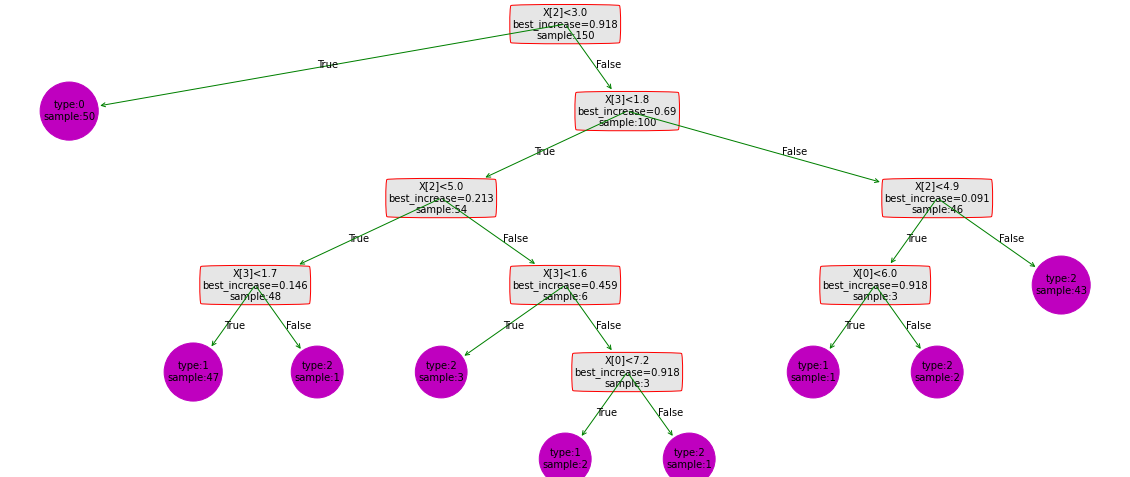

In [15]:
if __name__=='__main__':
    data_set=init_data_set()
    tree_dict = draw_tree(data_set)
    createPlot(tree_dict)